In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('CSV/spam.csv', encoding='latin1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.drop(columns=[ 'Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
data.rename(columns = {'v1' :'target','v2':'text'},inplace = True)

In [7]:
from sklearn.preprocessing import LabelEncoder
encoded = LabelEncoder()

In [8]:
data['target'] = encoded.fit_transform(data['target'])

In [9]:
data.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(403)

In [12]:
data = data.drop_duplicates(keep='first')

In [13]:
import nltk
from nltk import word_tokenize, sent_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to c:\Users\shres\Laptop\ML_Proj
[nltk_data]     ects\Email_Spam_Classifier\venv\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
nltk.download('punkt', download_dir="./venv/nltk_data")
nltk.download('punkt_tab', download_dir="./venv/nltk_data")
print(nltk.data.find("tokenizers/punkt"))


c:\Users\shres\Laptop\ML_Projects\Email_Spam_Classifier\venv\nltk_data\tokenizers\punkt


[nltk_data] Downloading package punkt to ./venv/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to ./venv/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [15]:
data['count_letters'] = data['text'].apply(len)

In [16]:
data.head()

,target,text,count_letters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
data['count_words'] = data['text'].apply(lambda x:len(word_tokenize(x)))

In [18]:
data.head()

,target,text,count_letters,count_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [19]:
data['count_sentences'] = data['text'].apply(lambda x:len(sent_tokenize(x)))

In [20]:
data.head()

,target,text,count_letters,count_words,count_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count_letters', ylabel='Count'>

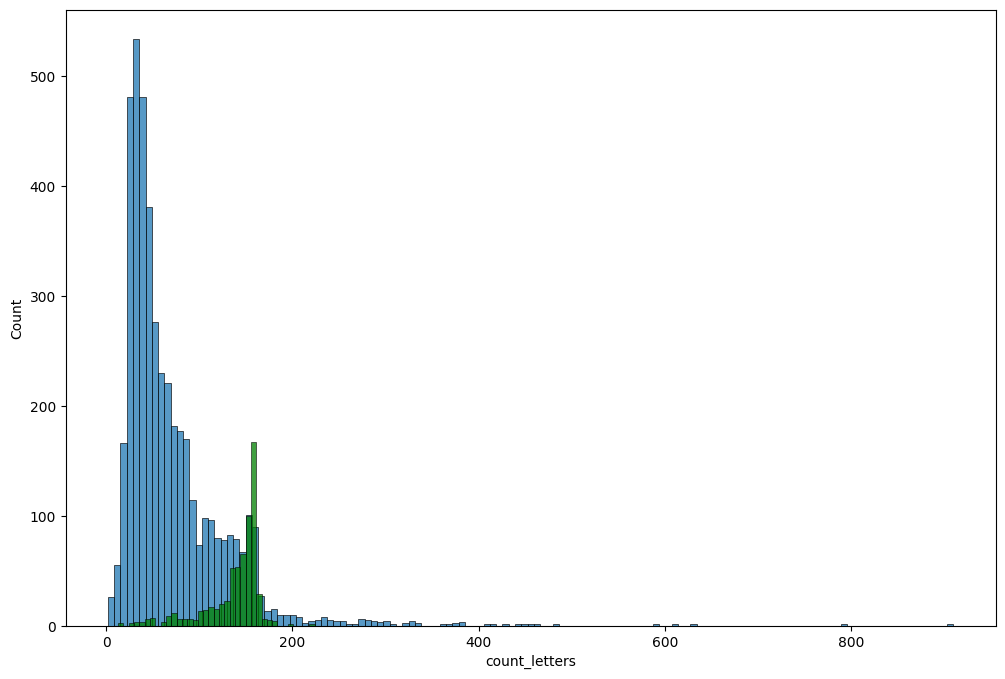

In [22]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['count_letters'])
sns.histplot(data[data['target'] == 1]['count_letters'],color = 'green')

<Axes: xlabel='count_words', ylabel='Count'>

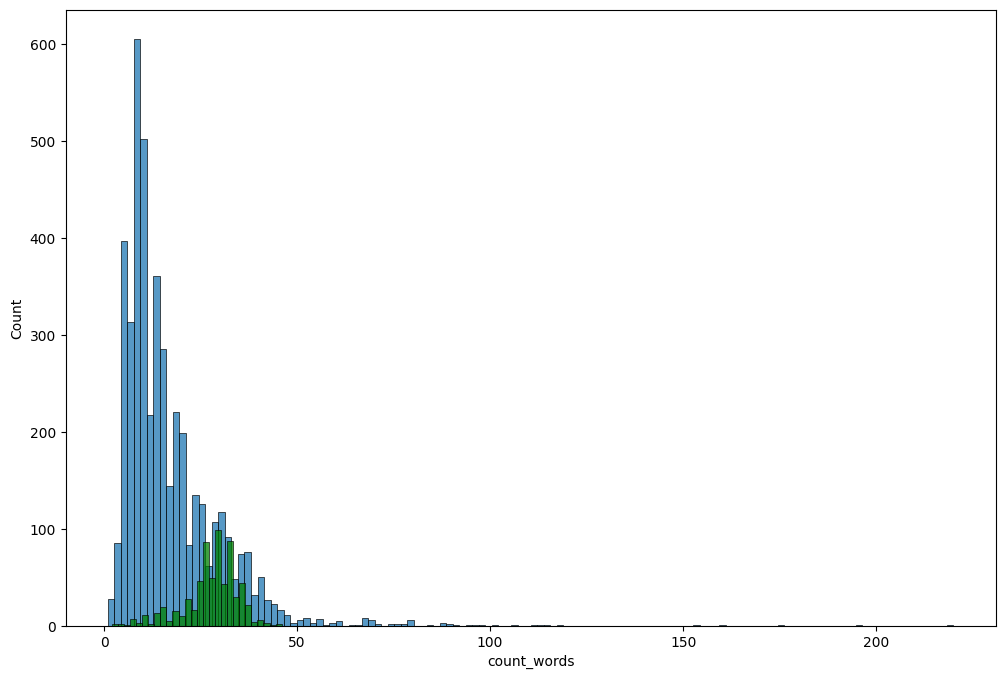

In [23]:
plt.figure(figsize=(12,8))
sns.histplot(data[data['target'] == 0]['count_words'])
sns.histplot(data[data['target'] == 1]['count_words'],color = 'green')

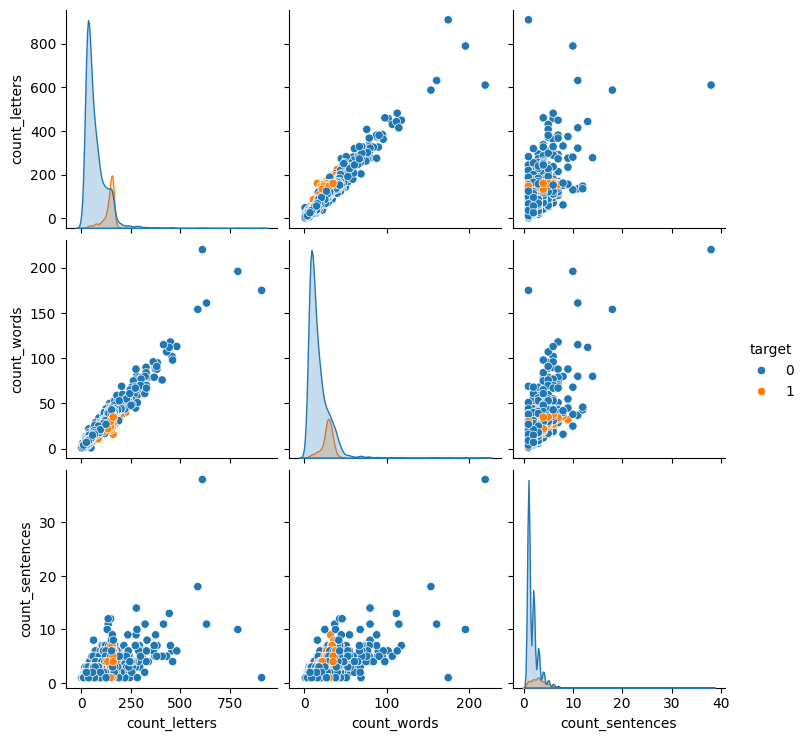

In [24]:
sns.pairplot(data,hue = 'target')

<Axes: >

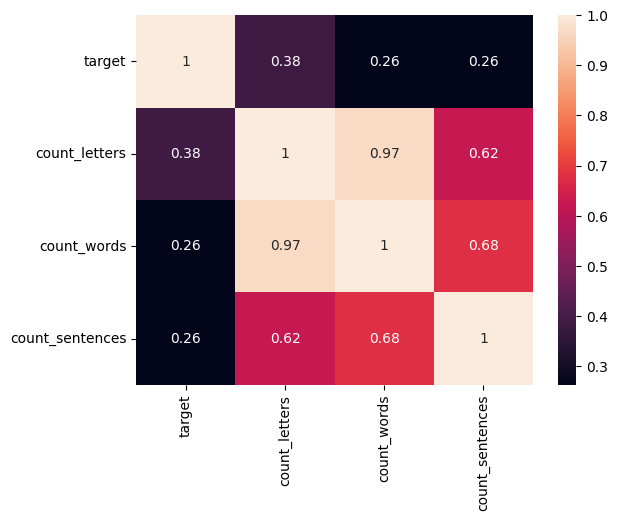

In [25]:
sns.heatmap(data.drop(columns=['text']).corr(), annot=True)

In [26]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to c:\Users\shres\Laptop\ML_
[nltk_data]     Projects\Email_Spam_Classifier\venv\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
def transform_text(text):
    tokens = nltk.word_tokenize(text.lower())

    main_text = [
        ps.stem(word)
        for word in tokens
        if word.isalnum() and word not in stop_words
    ]
    
    return ' '.join(main_text)

In [35]:
data['transformed_text']= data['text'].apply(transform_text)

In [36]:
data.head()

,target,text,count_letters,count_words,count_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
